In [1]:
import pandas as pd

In [3]:
df=pd.read_csv("C:/Users/vgaya/Downloads/archive (6)/2017_2020_bmi.csv")

In [5]:
df.sample(5)

,yr,height,weight,bmi,gender
7460,65+,151.75,57.00,24.75,0
3161,65+,163.52,65.76,24.59,1
645,8,130.43,29.46,17.32,1
4366,6,117.63,21.97,15.88,0
5242,15,159.67,49.34,19.35,0


In [7]:
df.shape

(7770, 5)

In [9]:
df.describe()

,height,weight,bmi,gender
count,7770.000000,7770.000000,7770.000000,7770.000000
mean,150.460698,52.817423,22.074587,0.499228
std,22.463589,18.356921,3.515722,0.500032
min,65.120000,7.080000,14.340000,0.000000
25%,149.960000,42.700000,19.200000,0.000000
50%,157.495000,58.350000,23.800000,0.000000
75%,163.920000,66.050000,24.970000,1.000000
max,174.500000,77.880000,26.260000,1.000000


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7770 entries, 0 to 7769
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   yr      7770 non-null   object 
 1   height  7770 non-null   float64
 2   weight  7770 non-null   float64
 3   bmi     7770 non-null   float64
 4   gender  7770 non-null   int64  
dtypes: float64(3), int64(1), object(1)
memory usage: 303.6+ KB


In [13]:
df.isnull().sum()

yr        0
height    0
weight    0
bmi       0
gender    0
dtype: int64

In [15]:
df.duplicated().sum()

97

In [17]:
df=df.drop_duplicates()

In [19]:
df.shape

(7673, 5)

In [21]:
df['gender'].value_counts()

gender
0    3840
1    3833
Name: count, dtype: int64

In [23]:
import matplotlib.pyplot as plt

<Axes: ylabel='count'>

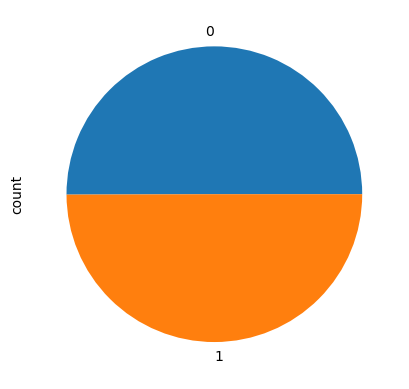

In [24]:
df['gender'].value_counts().plot(kind='pie')

the number males in the data set is almost equal to the number of females in the dataset so the dataset is not bised towards any gender

In [28]:
df.rename(columns={'yr': 'age'}, inplace=True)

In [30]:
df.head()

,age,height,weight,bmi,gender
0,0,69.96,10.29,21.02,1
1,0,71.69,10.89,21.19,1
2,0,68.54,10.93,23.27,1
3,0,69.69,9.38,19.31,1
4,0,71.30,7.93,15.59,1


(array([ 319.,  308.,  417.,  379.,  402.,  416.,  374.,  346.,  296.,
        4416.]),
 array([ 0. ,  2.1,  4.2,  6.3,  8.4, 10.5, 12.6, 14.7, 16.8, 18.9, 21. ]),
 <BarContainer object of 10 artists>)

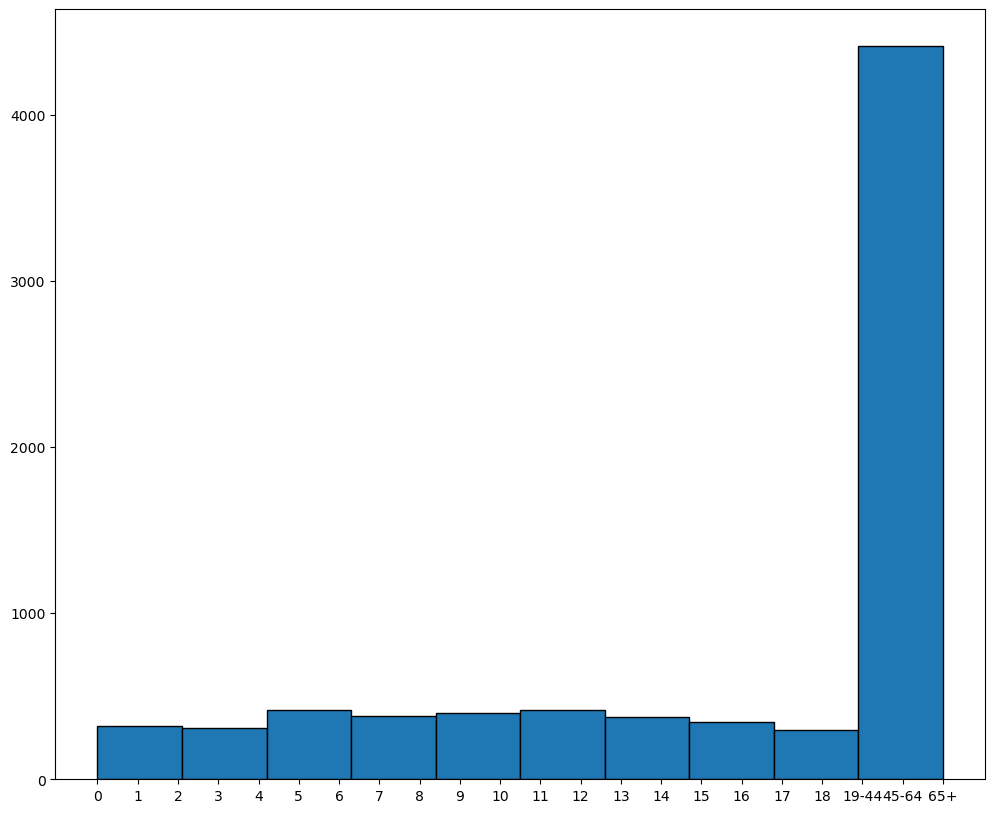

In [33]:
plt.figure(figsize=(12, 10))
plt.hist(df['age'],bins=10,edgecolor='black')

In [35]:
df['age'].value_counts()

age
65+      1944
45-64    1331
19-44    1141
11        216
5         213
10        205
6         204
8         202
12        200
9         197
14        192
4         185
16        182
13        182
7         177
17        173
15        164
1         126
18        123
3         123
2         123
0          70
Name: count, dtype: int64

In [37]:
df['age'].unique()

array(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '13', '14', '15', '16', '17', '18', '19-44', '45-64', '65+'],
      dtype=object)

The dataset is collected for every unique age from 0-18 and then it is collected for a cluster of ages because after 18 there will be no much change in height and weight 

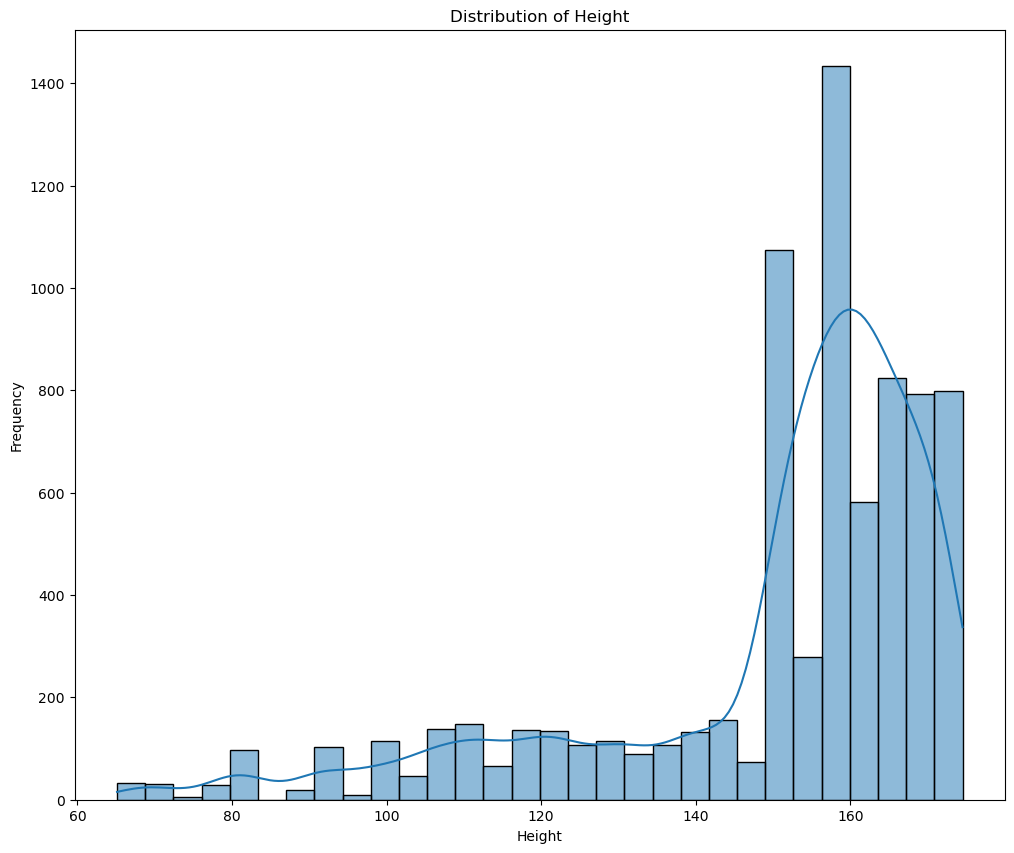

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 10))
sns.histplot(df['height'], bins=30, kde=True)  # kde=True adds a kernel density estimate curve
plt.xlabel('Height')
plt.ylabel('Frequency')
plt.title('Distribution of Height')
plt.show()

<Axes: ylabel='height'>

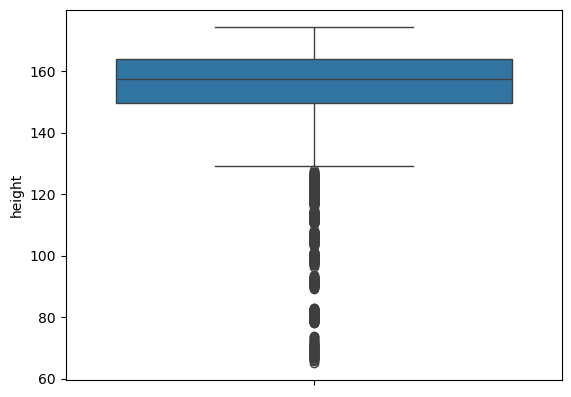

In [41]:
sns.boxplot(df['height'])

In [42]:
Q1 = df['height'].quantile(0.25)
Q3 = df['height'].quantile(0.75)
IQR = Q3 - Q1

# Define the bounds for detecting outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Find outliers
outliers = df[(df['height'] < lower_bound) | (df['height'] > upper_bound)]

In [43]:
outliers.shape

(1221, 5)

since there are large number of ouliers instead of dropping them it is better to replace them 

In [45]:
df['height'] = df['height'].apply(lambda x: lower_bound if x < lower_bound else (upper_bound if x > upper_bound else x))

<Axes: ylabel='height'>

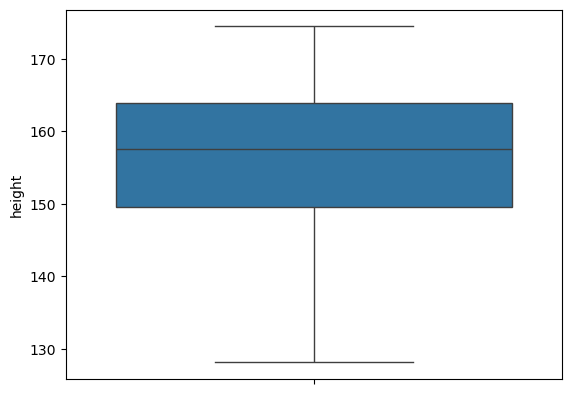

In [46]:
sns.boxplot(df['height'])

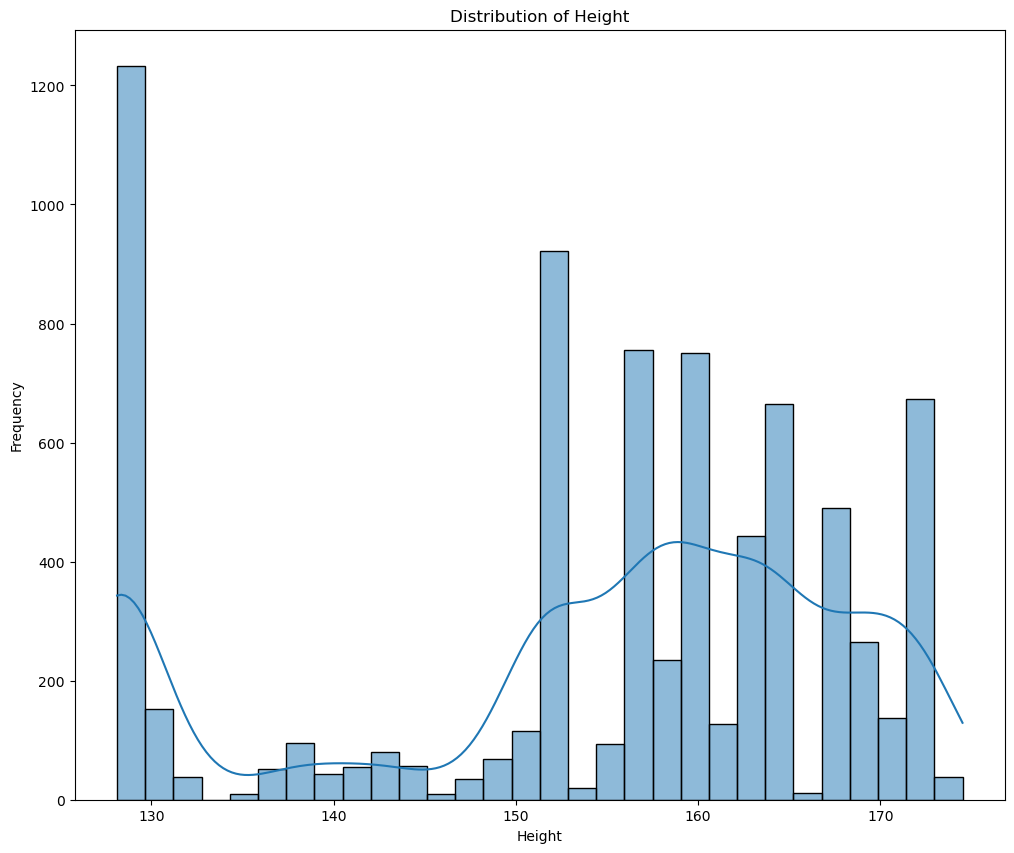

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 10))
sns.histplot(df['height'], bins=30, kde=True)  # kde=True adds a kernel density estimate curve
plt.xlabel('Height')
plt.ylabel('Frequency')
plt.title('Distribution of Height')
plt.show()

The outlier have been removed in the height collumn

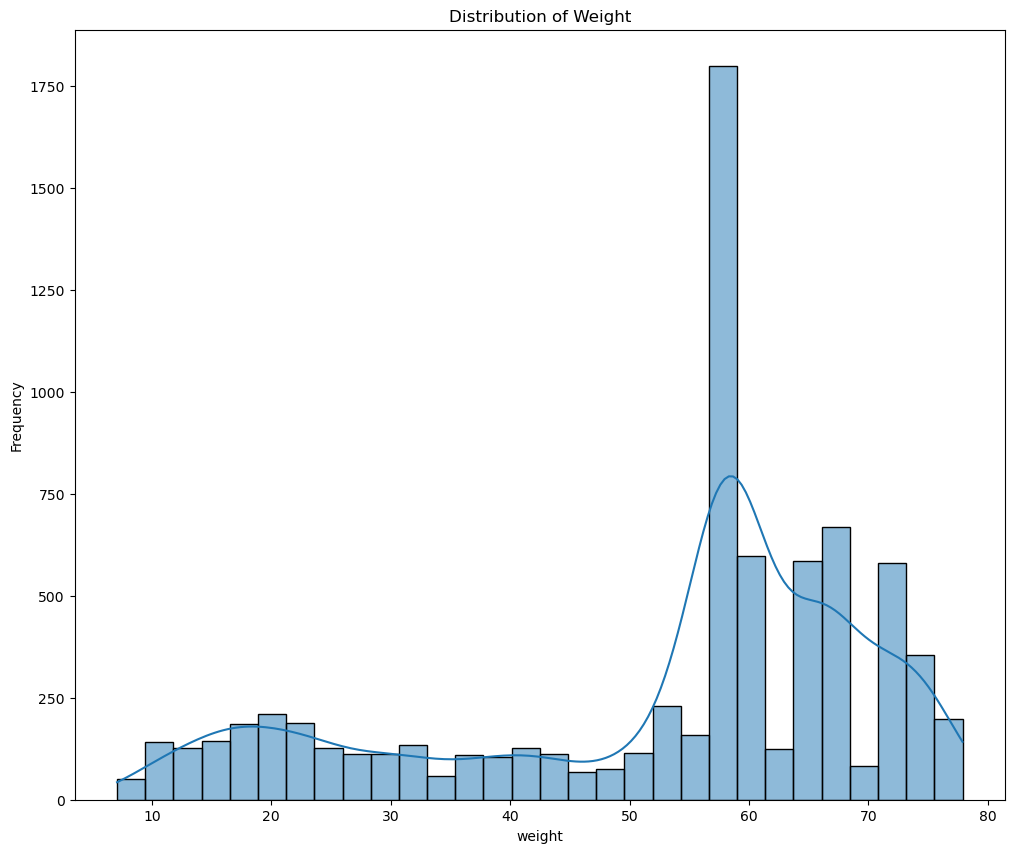

In [55]:
plt.figure(figsize=(12, 10))
sns.histplot(df['weight'], bins=30, kde=True)  # kde=True adds a kernel density estimate curve
plt.xlabel('weight')
plt.ylabel('Frequency')
plt.title('Distribution of Weight')
plt.show()

<Axes: ylabel='weight'>

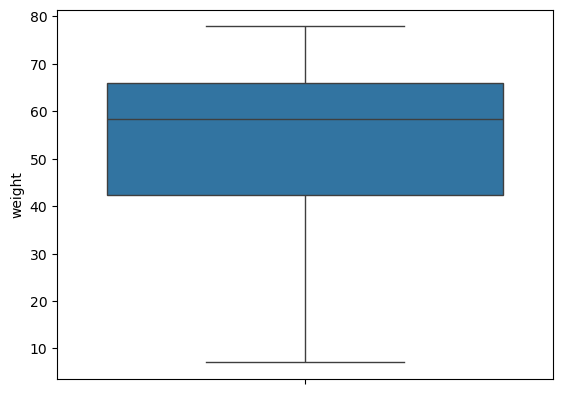

In [56]:
sns.boxplot(df['weight'])

There are no outlies in the weight collumn of the dataset

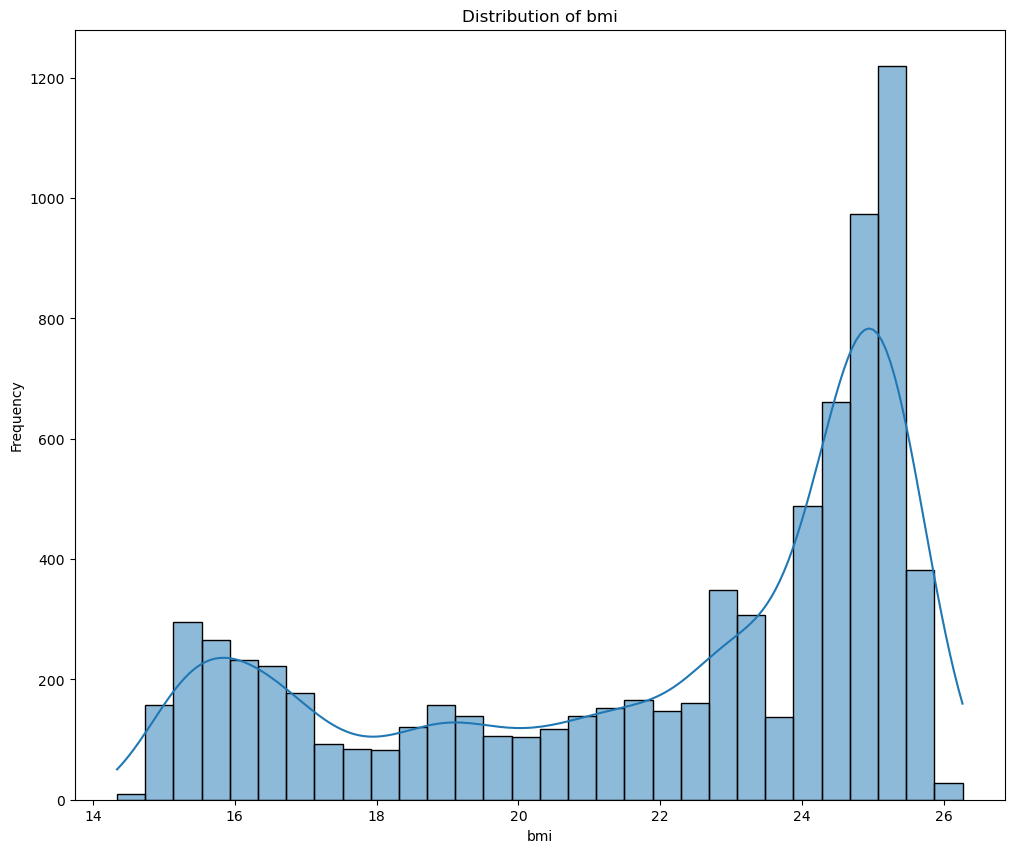

In [61]:
plt.figure(figsize=(12, 10))
sns.histplot(df['bmi'], bins=30, kde=True)  # kde=True adds a kernel density estimate curve
plt.xlabel('bmi')
plt.ylabel('Frequency')
plt.title('Distribution of bmi')
plt.show()

<Axes: ylabel='weight'>

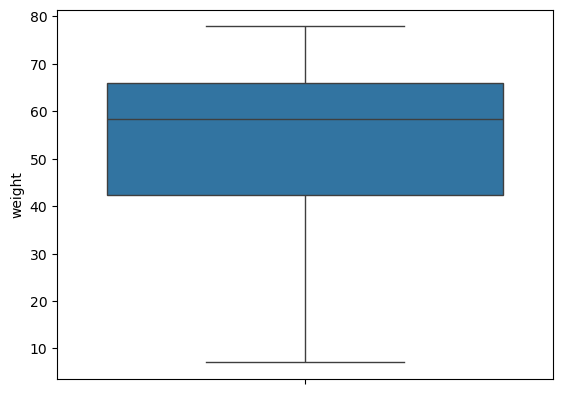

In [62]:
sns.boxplot(df['weight'])

There are no outlkiers in the bmi collumn of the dataset

In [66]:
# Group by the 'age' column
grouped = df.groupby('age')

# Display the first few groups
print(grouped.head())

      age  height  weight    bmi  gender
0       0  128.12   10.29  21.02       1
1       0  128.12   10.89  21.19       1
2       0  128.12   10.93  23.27       1
3       0  128.12    9.38  19.31       1
4       0  128.12    7.93  15.59       1
...   ...     ...     ...    ...     ...
2827  65+  162.93   65.27  24.59       1
2828  65+  163.47   66.02  24.71       1
2829  65+  163.97   65.91  24.51       1
2830  65+  164.09   66.24  24.60       1
2831  65+  165.12   67.77  24.85       1

[110 rows x 5 columns]


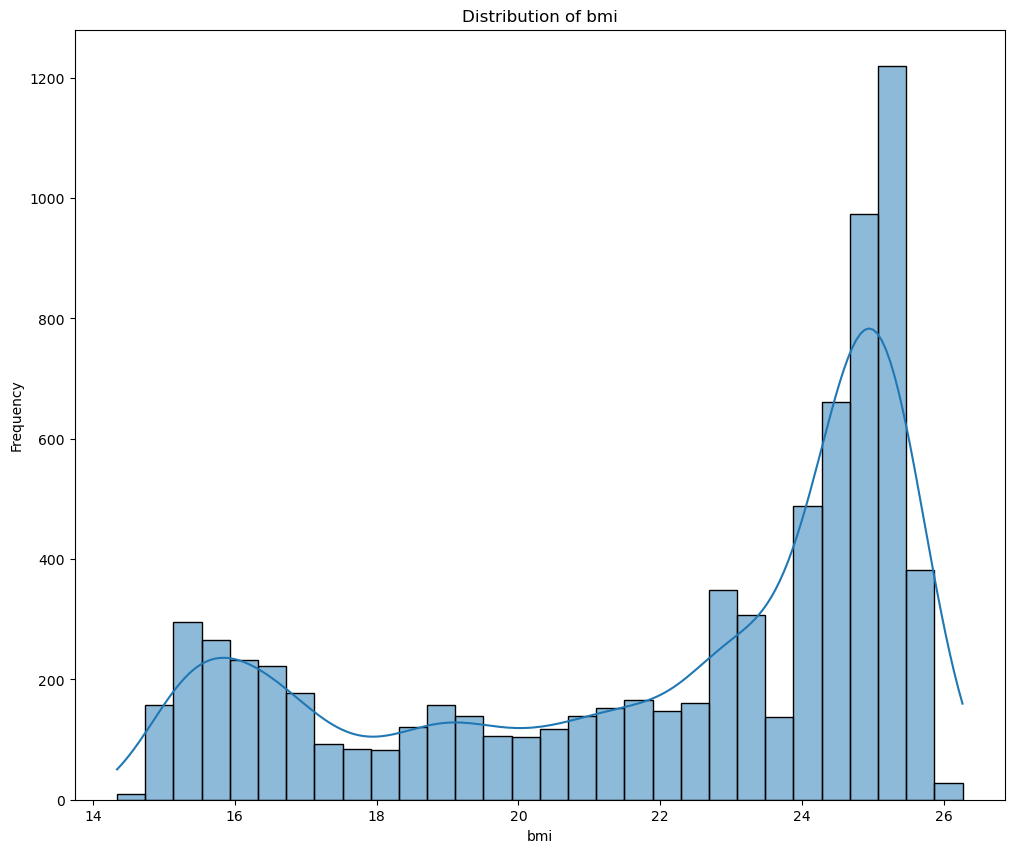

In [71]:
plt.figure(figsize=(12, 10))
sns.histplot(df['bmi'], bins=30, kde=True)  # kde=True adds a kernel density estimate curve
plt.xlabel('bmi')
plt.ylabel('Frequency')
plt.title('Distribution of bmi')
plt.show()

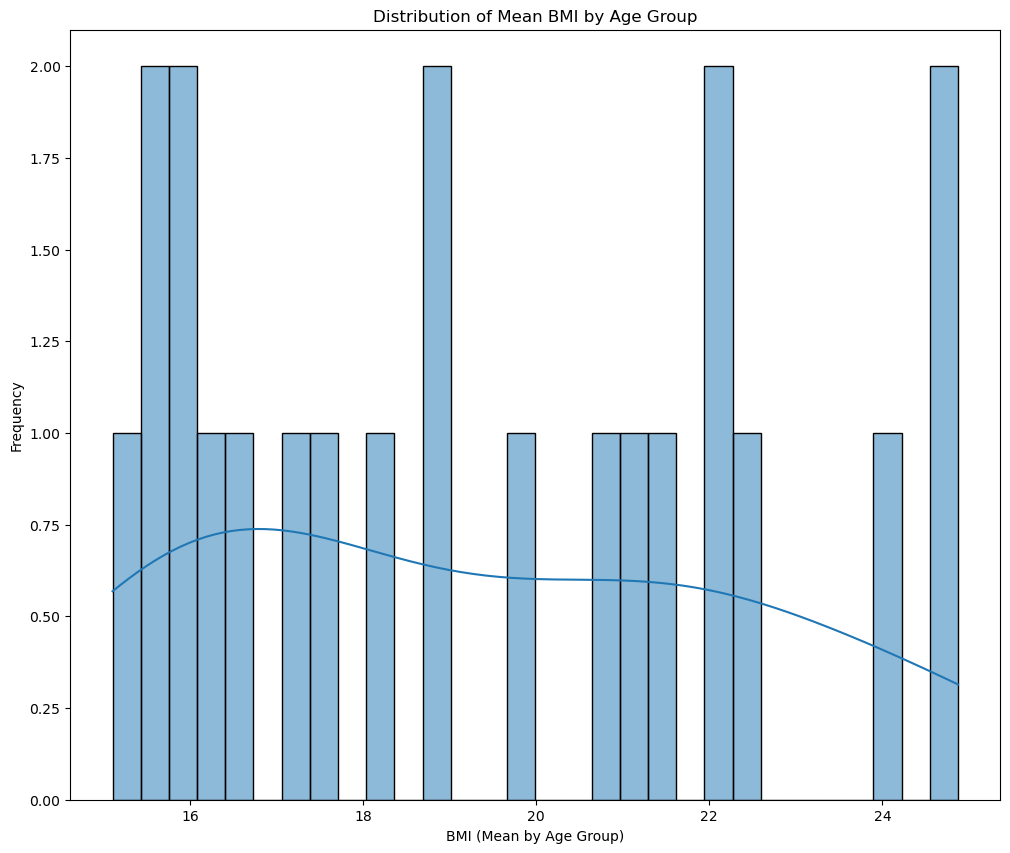

In [75]:
import matplotlib.pyplot as plt
import seaborn as sns

# First, calculate the mean 'bmi' for each 'age' group
bmi_by_age = df.groupby('age')['bmi'].mean()

# Now, plot the distribution of the mean BMI values
plt.figure(figsize=(12, 10))
sns.histplot(bmi_by_age, bins=30, kde=True)  # kde=True adds a kernel density estimate curve
plt.xlabel('BMI (Mean by Age Group)')
plt.ylabel('Frequency')
plt.title('Distribution of Mean BMI by Age Group')
plt.show()

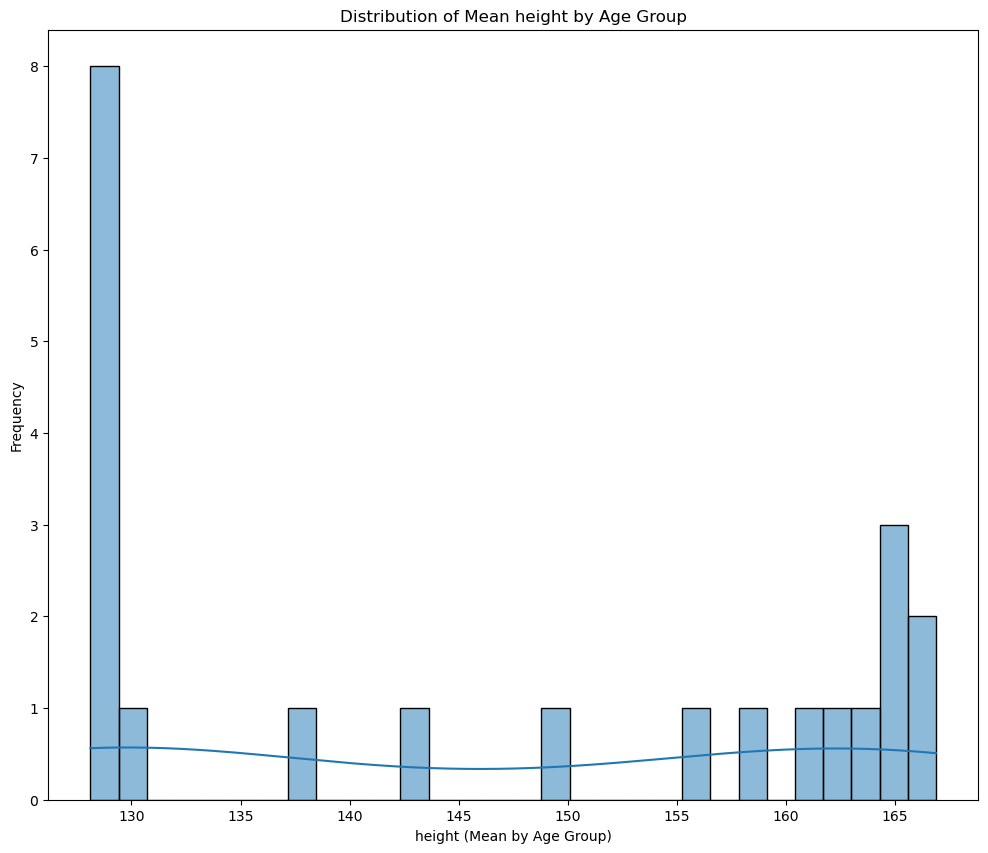

In [77]:
import matplotlib.pyplot as plt
import seaborn as sns

# First, calculate the mean 'bmi' for each 'age' group
bmi_by_age = df.groupby('age')['height'].mean()

# Now, plot the distribution of the mean BMI values
plt.figure(figsize=(12, 10))
sns.histplot(bmi_by_age, bins=30, kde=True)  # kde=True adds a kernel density estimate curve
plt.xlabel('height (Mean by Age Group)')
plt.ylabel('Frequency')
plt.title('Distribution of Mean height by Age Group')
plt.show()

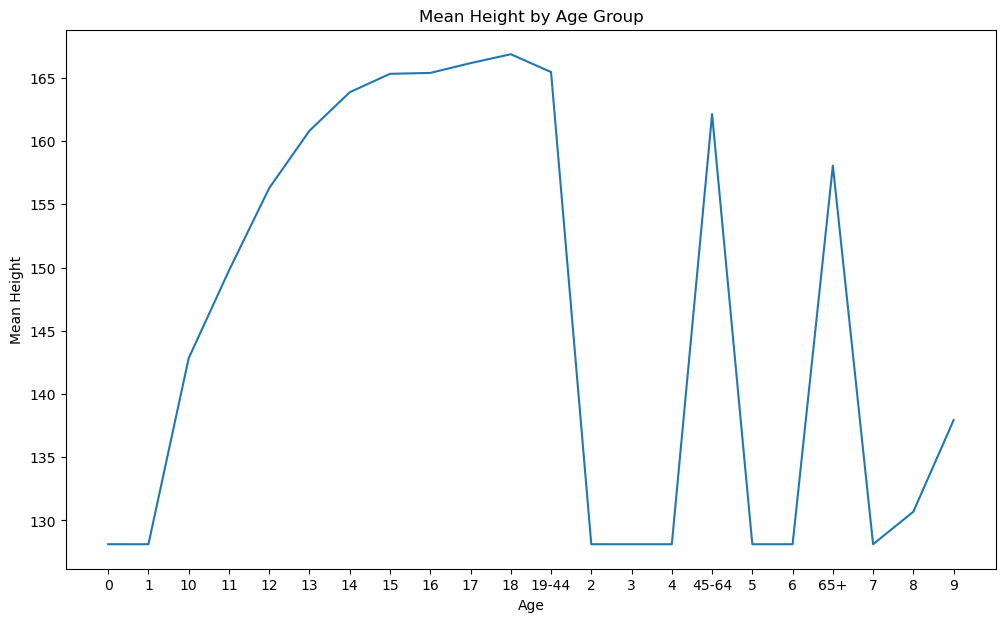

In [91]:
# First, calculate the mean 'height' for each 'age' group
mean_height_by_age = df.groupby('age')['height'].mean()

# Now, plot the mean height against age
plt.figure(figsize=(12, 7))
sns.lineplot(x=mean_height_by_age.index, y=mean_height_by_age.values)

plt.xlabel('Age')
plt.ylabel('Mean Height')
plt.title('Mean Height by Age Group')
plt.show()

# First, calculate the mean 'height' for each 'age' group
mean_height_by_age = df.groupby('age')['weight'].mean()

# Now, plot the mean height against age
plt.figure(figsize=(12, 10))
sns.lineplot(x=mean_height_by_age.index, y=mean_height_by_age.values)

plt.xlabel('Age')
plt.ylabel('Mean weight')
plt.title('Mean weight by Age Group')
plt.show()

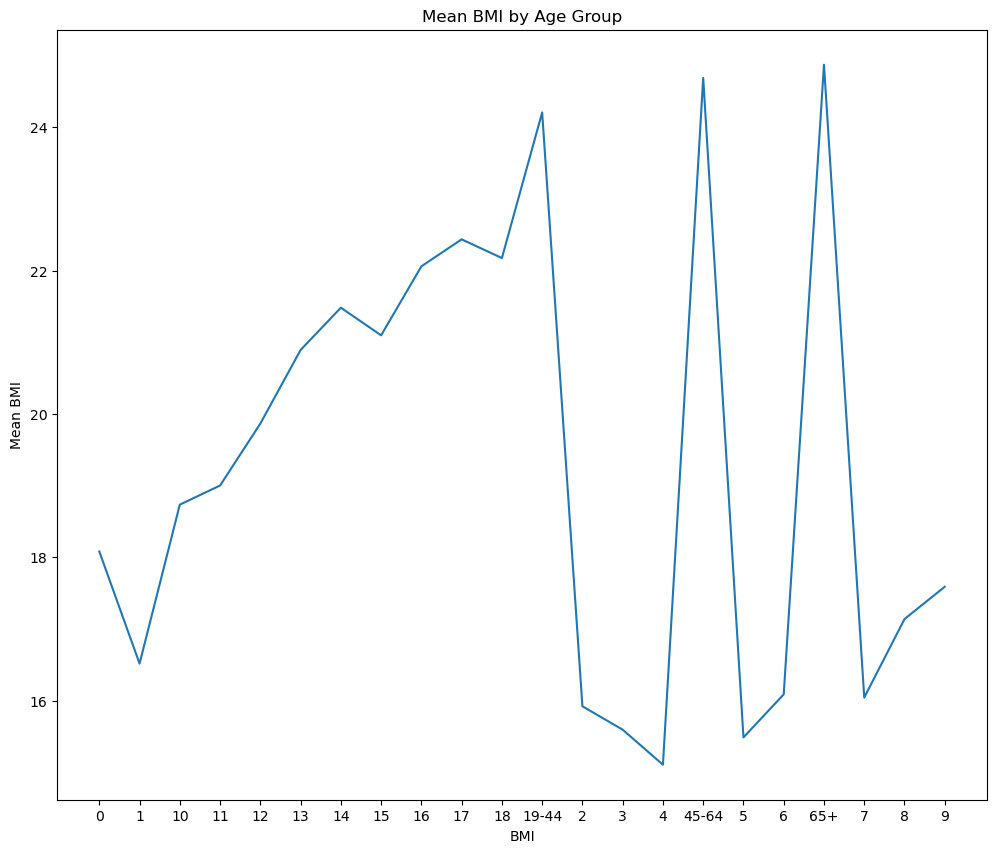

In [87]:
# First, calculate the mean 'height' for each 'age' group
mean_height_by_age = df.groupby('age')['bmi'].mean()

# Now, plot the mean height against age
plt.figure(figsize=(12, 10))
sns.lineplot(x=mean_height_by_age.index, y=mean_height_by_age.values)

plt.xlabel('BMI')
plt.ylabel('Mean BMI')
plt.title('Mean BMI by Age Group')
plt.show()

Bivariate Analysis

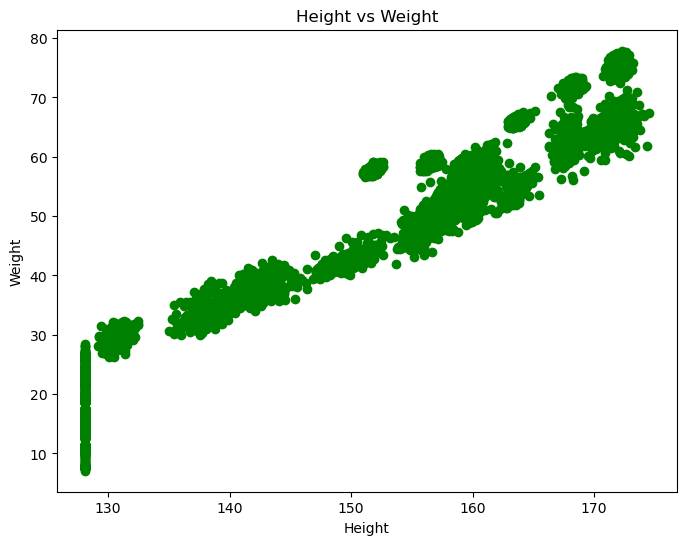

In [94]:
# Scatter plot for height vs weight
plt.figure(figsize=(8, 6))
plt.scatter(df['height'], df['weight'], color='green')
plt.title('Height vs Weight')
plt.xlabel('Height')
plt.ylabel('Weight')
plt.show()

In [96]:
# Correlation between height and weight
correlation_hw = df['height'].corr(df['weight'])
print(f'Correlation between height and weight: {correlation_hw}')


Correlation between height and weight: 0.9623013810206329


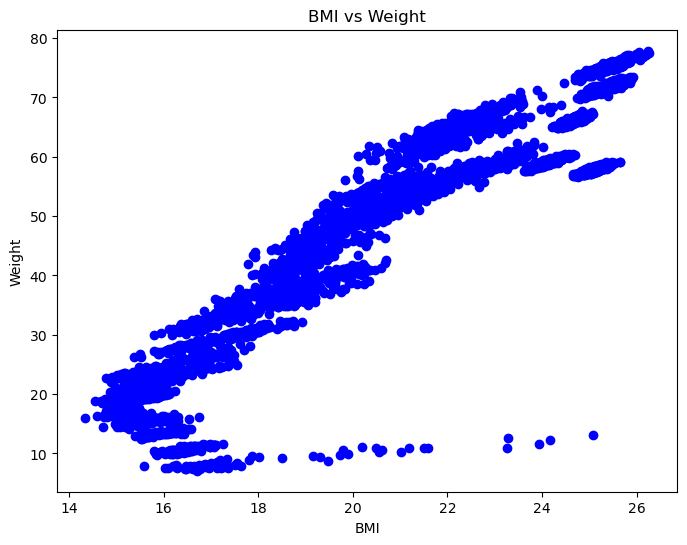

In [98]:
# Scatter plot for BMI vs weight
plt.figure(figsize=(8, 6))
plt.scatter(df['bmi'], df['weight'], color='blue')
plt.title('BMI vs Weight')
plt.xlabel('BMI')
plt.ylabel('Weight')
plt.show()

In [102]:
 #Group by gender and calculate the mean of height, weight, and BMI
grouped_by_gender = df.groupby('gender')[['height', 'weight', 'bmi']].mean()
print("\nMean of height, weight, and BMI by gender:\n", grouped_by_gender)



Mean of height, weight, and BMI by gender:
             height     weight        bmi
gender                                  
0       149.870794  48.513557  21.658247
1       158.231881  56.897795  22.427047


C:\Users\vgaya\AppData\Local\Temp\ipykernel_14000\1563049360.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='gender', y='height', data=df, palette='Set2')


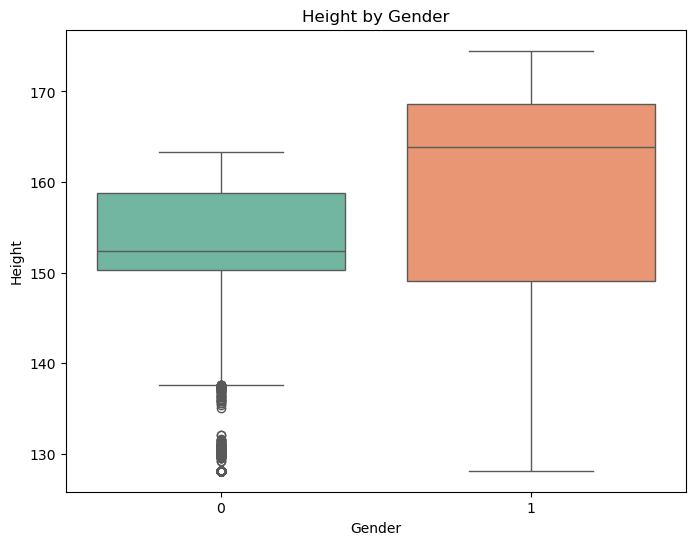

In [104]:
# Boxplot: Height by Gender
plt.figure(figsize=(8, 6))
sns.boxplot(x='gender', y='height', data=df, palette='Set2')
plt.title('Height by Gender')
plt.xlabel('Gender')
plt.ylabel('Height')
plt.show()


C:\Users\vgaya\AppData\Local\Temp\ipykernel_14000\2478403746.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='gender', y='weight', data=df, palette='Set1')


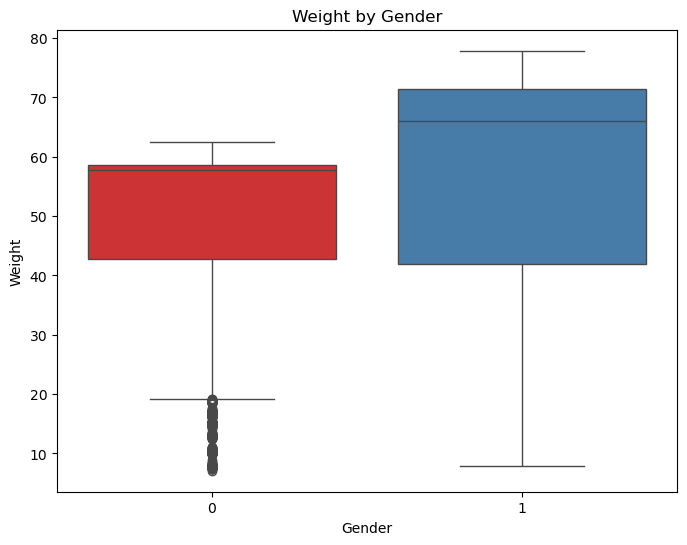

In [106]:
# Boxplot: Weight by Gender
plt.figure(figsize=(8, 6))
sns.boxplot(x='gender', y='weight', data=df, palette='Set1')
plt.title('Weight by Gender')
plt.xlabel('Gender')
plt.ylabel('Weight')
plt.show()

C:\Users\vgaya\AppData\Local\Temp\ipykernel_14000\3524934599.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='gender', y='bmi', data=df, palette='Set3')


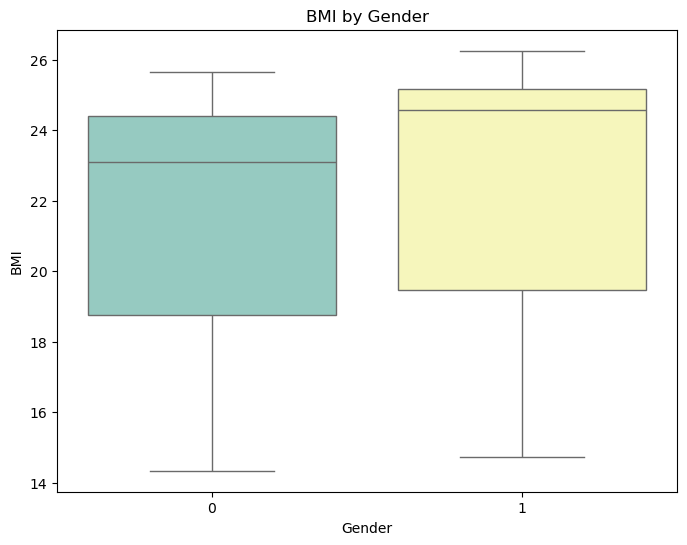

In [108]:
# Boxplot: BMI by Gender
plt.figure(figsize=(8, 6))
sns.boxplot(x='gender', y='bmi', data=df, palette='Set3')
plt.title('BMI by Gender')
plt.xlabel('Gender')
plt.ylabel('BMI')
plt.show()


<Figure size 1200x800 with 0 Axes>

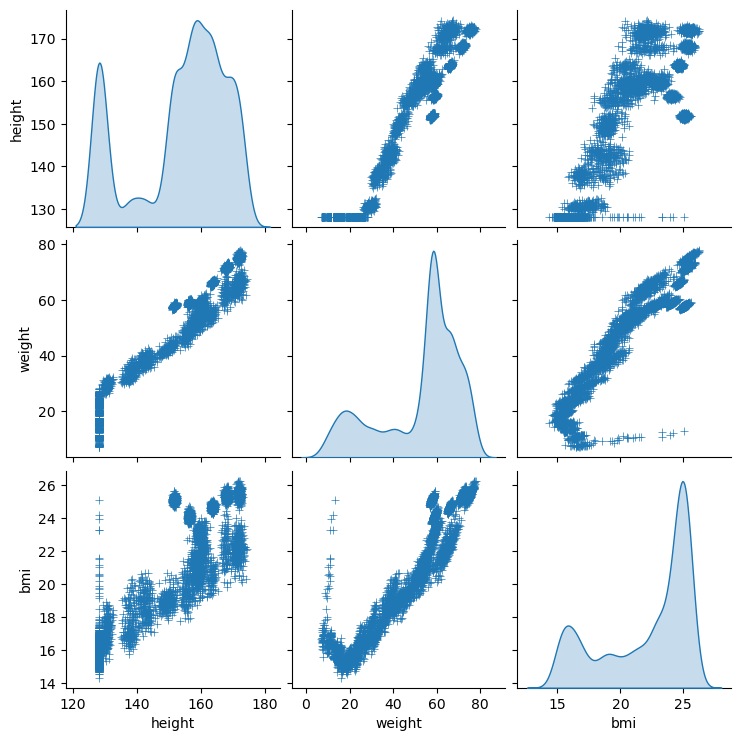

In [110]:
# Pair plot to see pairwise relationships in the dataset
plt.figure(figsize=(12, 8))
sns.pairplot(df[['height', 'weight', 'bmi']], diag_kind='kde', markers='+')
plt.show()